In [67]:
import pandas as pd
import numpy as np

There is an issue with the reading of the CSV file, where pandas found a problem with the structure of the data - 12 columns in line 3350, but it found 13.
Goung to to open the dataset in the excel file to observe the issue and remoe it mannually.

There was also a issue with 12, called 'Unnamed: 12' which idicated that some of the data in the title column has spilled over to the authors column, and consequently, the subsequent columns have also been shifted in columns 4702, 5877, and 8979. I' going to correct it manually in the Excel file since there are just few of them. 


In [68]:

books = pd.read_csv('/Users/anetasullivan/Desktop/C/books.csv')

In [69]:

books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9.780440e+12,eng,652,2095690,27591,9/16/06,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9.780440e+12,eng,870,2153167,29221,9/1/04,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352,6333,244,11/1/03,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/04,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9.780440e+12,eng,2690,41428,164,9/13/04,Scholastic


I will drop the book ID because I dont need it. 

In [70]:
books.drop(columns=['bookID'], inplace=True)

In [71]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float64
 3   isbn                11127 non-null  object 
 4   isbn13              11127 non-null  float64
 5   language_code       11127 non-null  object 
 6     num_pages         11127 non-null  int64  
 7   ratings_count       11127 non-null  int64  
 8   text_reviews_count  11127 non-null  int64  
 9   publication_date    11127 non-null  object 
 10  publisher           11127 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 956.4+ KB


In [72]:
books.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780350e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780590e+12,299.000000,7.450000e+02,46.000000
75%,4.135000,9.780870e+12,416.000000,4.993500e+03,237.500000
max,5.000000,9.790010e+12,6576.000000,4.597666e+06,94265.000000


In [73]:
# Removing leading and trailing spaces, replacing spaces with underscores & converting all to lowercase.
books.columns = books.columns.str.strip().str.replace(' ', '_').str.lower()


In [74]:
books.isnull().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [75]:
books.dtypes

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [76]:
# Keep isbns as as strings
books['isbn'] = books['isbn'].astype(str)
books['isbn13'] = books['isbn13'].astype(str)


In [77]:
books.dtypes

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                 object
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [78]:
# Covert publication_date to Datetime format
books['publication_date'] = pd.to_datetime(books['publication_date'], errors='coerce')


/var/folders/tz/ks8nm4113zq4z5n0g59b4pnr0000gn/T/ipykernel_11957/429059703.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  books['publication_date'] = pd.to_datetime(books['publication_date'], errors='coerce')


In [79]:
# Displaying unique values of 'publication_date' column
books['publication_date'].unique()


<DatetimeArray>
['2006-09-16 00:00:00', '2004-09-01 00:00:00', '2003-11-01 00:00:00',
 '2004-05-01 00:00:00', '2004-09-13 00:00:00', '2005-04-26 00:00:00',
 '2005-09-12 00:00:00', '2005-11-01 00:00:00', '2002-04-30 00:00:00',
 '2004-08-03 00:00:00',
 ...
 '1989-02-23 00:00:00', '2000-01-28 00:00:00', '2001-09-14 00:00:00',
 '2018-10-23 00:00:00', '2005-03-05 00:00:00', '1980-05-29 00:00:00',
 '1997-08-12 00:00:00', '1998-05-31 00:00:00', '1977-07-10 00:00:00',
 '2003-10-11 00:00:00']
Length: 3677, dtype: datetime64[ns]

I want to see if any entries failed to convert in the 'publlication_date' column: 
    Book with bookid 31373 titled "In Pursuit of the Proper Sinner" by Elizabeth George.
    Book with bookid 45531 titled "Montaillou village occitan de 1294 à 1324" by Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie.

In [80]:
# Checking for 'NaT' values in 'publication_date' column
nat_values = books[books['publication_date'].isna()]

# Displaying rows with 'NaT' values
nat_values


,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8180,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780550000000.0,eng,718,10608,295,NaT,Bantam Books
11098,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070000000.0,fre,640,15,2,NaT,Folio histoire


Because there are only teo dates missing, I decided to fill them in manually. 

In [81]:
# Filling in the date for books with titles containing "In Pursuit of the Proper Sinner"
books.loc[books['isbn']== '0553575104', 'publication_date'] = pd.to_datetime('1999-01-01')
books.loc[books['isbn']== '2070323285', 'publication_date'] = pd.to_datetime('1975-01-01')

In [82]:
filtered_books = books[books['isbn'].isin(['0553575104', '2070323285'])][['title', 'publication_date']]
print(filtered_books)


                                                   title publication_date
8180   In Pursuit of the Proper Sinner (Inspector Lyn...       1999-01-01
11098         Montaillou  village occitan de 1294 à 1324       1975-01-01


In [83]:
missing_dates = books[books['publication_date'].isna()]
print(missing_dates[['title', 'publication_date']])


Empty DataFrame
Columns: [title, publication_date]
Index: []


In [84]:
from datetime import datetime
future_dates = books[books['publication_date'] > datetime.today()]
print(future_dates[['title', 'publication_date']])


                                                   title publication_date
92                CliffsNotes on Tolstoy's Anna Karenina       2065-11-26
121                              Henry Miller on Writing       2064-02-01
127                        The Air-Conditioned Nightmare       2070-01-17
147                                     On Beyond Zebra!       2055-09-12
236    For the New Intellectual: The Philosophy of Ay...       2063-12-01
...                                                  ...              ...
10435                            For Whom the Bell Tolls       2040-01-01
10436     Cliffs Notes on Hemingway's The Sun Also Rises       2064-05-20
10463         CliffsNotes on Shakespeare's Twelfth Night       2060-09-20
10947  Poetry and Prose of Alexander Pope (Riverside ...       2068-01-02
11024                 I Never Promised You a Rose Garden       2065-03-01

[153 rows x 2 columns]


In [85]:
print(books['publication_date'].describe())


count                            11127
mean     2002-02-07 03:24:51.830682240
min                1973-01-01 00:00:00
25%                1998-12-01 00:00:00
50%                2003-04-28 00:00:00
75%                2005-11-01 00:00:00
max                2072-12-31 00:00:00
Name: publication_date, dtype: object


There are obviously some issues with some of the dates in 153 books in 'publication_date', they are set in the future, which is clearly incorrect. Going to find out the reason. 

I have decided to extract the year from the date and create a new column called 'publication_year' and dropm the 'publication _date'

In [86]:
# Assuming df is your DataFrame with many columns including 'publication_date'
books['year'] = pd.to_datetime(books['publication_date']).dt.year


In [87]:
# Drop the 'publishing_date'
books.drop(columns=['publication_date'], inplace=True)

In [88]:
# Filter rows where the year is greater than the current year
future_books = books[books['year'] > pd.Timestamp.now().year]

# Count the number of books published in the future
number_of_future_books = len(future_books)

print(f"There are {number_of_future_books} books that were published in the future.")

There are 153 books that were published in the future.


Going through the dates and comaparing it to the outside sources, it seems like there was a mistake with the dates, they were all publish in 1900 not in 2000. So I will just have to fix the 20 and put there 19. 

In [89]:
# Function to correct years starting with 20xx
def correct_year(year):
    year_str = str(year)
    if year_str.startswith('20'):
        return int('19' + year_str[2:])
    return year

# Only apply the correction to the rows with future publication years
books.loc[books['year'] > 2023, 'year'] = books[books['year'] > 2023]['year'].apply(correct_year)

# To verify the changes
print(books.loc[books['year'] > 2023, 'year']) # This should now be empty if all future dates are corrected


Series([], Name: year, dtype: int64)


In [90]:
books.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,year
count,11127.000000,11127.000000,1.112700e+04,11127.000000,11127.000000
mean,3.933631,336.376921,1.793641e+04,541.854498,2000.238699
std,0.352445,241.127305,1.124794e+05,2576.176608,7.952481
min,0.000000,0.000000,0.000000e+00,0.000000,1925.000000
25%,3.770000,192.000000,1.040000e+02,9.000000,1998.000000
50%,3.960000,299.000000,7.450000e+02,46.000000,2003.000000
75%,4.135000,416.000000,4.993500e+03,237.500000,2005.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000,2023.000000


In [91]:
# Find any duplicates
duplicates = books.duplicated()

In [92]:
num_duplicates = duplicates.sum()
print(f"There are {num_duplicates} duplicate rows.")


There are 0 duplicate rows.


It seems like there are books with 0 pages and 0 reviews. It need to be explored more in detail. 

## Exploring average_rating column

In [93]:
# Find the smallest average rating
smallest_avg_rating = books['average_rating'].min()

# Filter the books with the smallest average rating
books_with_smallest_avg_rating = books[books['average_rating'] == smallest_avg_rating]

# Display the books with the smallest average rating
print(books_with_smallest_avg_rating)

# Count the number of such books
num_books_with_smallest_avg_rating = books_with_smallest_avg_rating.shape[0]
print(f"\nNumber of books with the smallest average rating: {num_books_with_smallest_avg_rating}")


                                                   title  \
265    Out to Eat London 2002 (Lonely Planet Out to Eat)   
375                       Juiced Official Strategy Guide   
987             Open City 6: The Only Woman He Ever Left   
2532   How To Meditate: An Anthology Of Talks On Medi...   
2533          Insights: Talks On The Nature Of Existence   
2758                 Venac sonetnih venaca; Puževa srma   
3493   Brodie's notes on Aldous Huxley's brave new world   
4242                                 American Film Guide   
4678   The Man and the Author: John Milton: Twentieth...   
5325   Canopy: A Work for Voice and Light in Harvard ...   
6383          Laguna  I Love You: The Best of "Our Town"   
6561                   American Writers  Supplement VIII   
6862                            The Road To War  1933 39   
6880   I'll Be Home Before Midnight and I Won't Get P...   
7147   Mythographi Graeci 1: Apollodori Bibliotheca  ...   
7402                    Sclerotherapy an

My initial thought was to edit the missing ratings manually from the GoodReads since it is only 26 books but after going through the books, I found out they didn't received any reviews or had only 1 rating so I decided to drop all of them. 

Before I go ahead and will delete some row, I would like to see correlation matrix. 

In [94]:
correlation = books['average_rating'].apply(lambda x: 1 if x == 0 else 0).corr(books['num_pages'].apply(lambda x: 1 if x == 0 else 0))
print(correlation)

-0.004013392450019268


No linear correlation between those two. 

In [95]:
# Drop the books with 0 ratings
books = books[books['average_rating'] != 0]

In [96]:
books.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,year
count,11101.000000,11101.000000,1.110100e+04,11101.000000,11101.000000
mean,3.942844,336.650212,1.797842e+04,543.123502,2000.246644
std,0.296950,241.209946,1.126077e+05,2579.058368,7.949994
min,1.000000,0.000000,0.000000e+00,0.000000,1925.000000
25%,3.780000,193.000000,1.050000e+02,9.000000,1998.000000
50%,3.960000,300.000000,7.490000e+02,47.000000,2003.000000
75%,4.140000,416.000000,5.019000e+03,239.000000,2005.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000,2023.000000


In [97]:
count_zero_rating_books = books[books['average_rating'] == 0].shape[0]
print(f"Number of books with 0 average rating: {count_zero_rating_books}")


Number of books with 0 average rating: 0


## Exploring num_pages columns

In [98]:
# Looking for outliers in num pages 
def find_outliers(column):
    
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return column.index[(column < lower_bound) | (column > upper_bound)]

outliers_index = find_outliers(books['num_pages'])

print("Outliers in num_pages are at index positions:", outliers_index.tolist())
print(books.loc[outliers_index, ['title', 'num_pages']])


Outliers in num_pages are at index positions: [1, 4, 6, 7, 8, 11, 21, 22, 24, 62, 84, 85, 89, 90, 91, 93, 94, 95, 128, 166, 173, 176, 177, 179, 188, 201, 213, 233, 235, 237, 250, 267, 269, 270, 335, 398, 401, 406, 420, 421, 526, 529, 595, 604, 605, 606, 609, 615, 626, 627, 628, 648, 655, 657, 667, 669, 682, 683, 702, 713, 714, 715, 722, 724, 726, 733, 761, 780, 796, 806, 808, 811, 816, 822, 897, 904, 906, 998, 999, 1001, 1002, 1003, 1004, 1005, 1053, 1055, 1056, 1057, 1087, 1102, 1103, 1105, 1110, 1145, 1146, 1148, 1166, 1176, 1179, 1180, 1181, 1225, 1280, 1326, 1332, 1344, 1353, 1370, 1380, 1386, 1407, 1408, 1409, 1428, 1439, 1518, 1521, 1528, 1541, 1560, 1571, 1575, 1592, 1593, 1620, 1625, 1633, 1634, 1643, 1660, 1695, 1721, 1734, 1750, 1766, 1785, 1795, 1825, 1837, 1872, 1873, 1913, 1961, 1981, 1985, 1987, 1989, 1990, 2004, 2005, 2054, 2059, 2065, 2117, 2159, 2182, 2192, 2257, 2271, 2274, 2323, 2324, 2446, 2541, 2542, 2543, 2544, 2545, 2559, 2566, 2594, 2620, 2630, 2650, 2653, 2744,

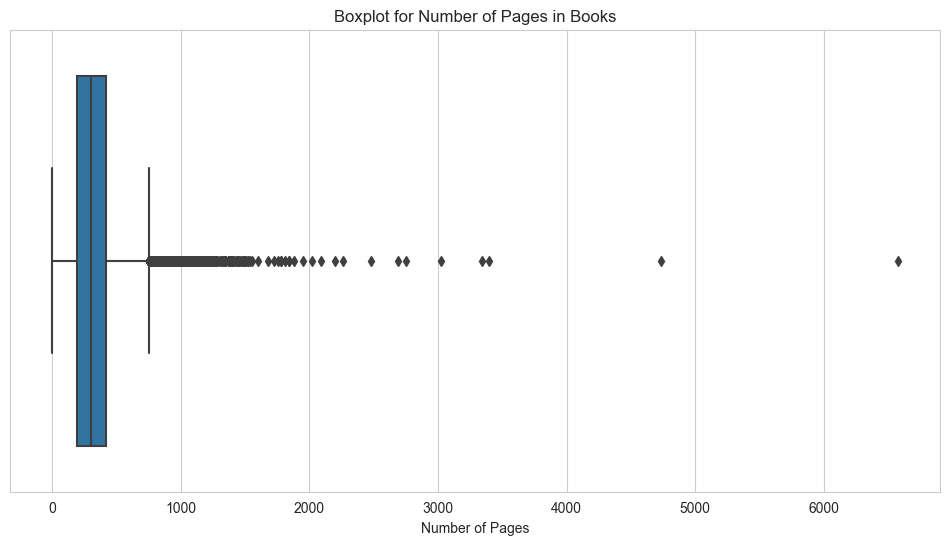

In [99]:
# Set the style of seaborn for better aesthetics
sns.set_style('whitegrid')

# Plot a boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=books['num_pages'])
plt.title('Boxplot for Number of Pages in Books')
plt.xlabel('Number of Pages')

# Annotate Outliers
outliers = books.loc[outliers_index, 'num_pages']
for index in outliers_index:
    plt.annotate(text=books.loc[index, 'title'],
                 xy=(0, books.loc[index, 'num_pages']),
                 xytext=(0.5, books.loc[index, 'num_pages']),
                 arrowprops=dict(facecolor='yellow', shrink=0.05))

plt.show()


The box itself shows that the majority of the book falls around 200-400 pages. When looking at the boxplot it show that there are many outliers probably due to being part of a book series collected into one volume. The box 

In [133]:
# Find the books with 0 pages
zero_pages = books['num_pages'].min()

# Filter the books with the smallest average rating
books_with_zero = books[books['num_pages'] == zero_pages]

# Display the books with the smallest average rating
print(books_with_zero)

# Count the number of such books
num_books_with_zero = books_with_zero.shape[0]
print(f"\nNumber of books with the smallest average rating: {num_books_with_zero}")

                                                   title  \
306    The 5 Love Languages / The 5 Love Languages Jo...   
853                     The Tragedy of Pudd'nhead Wilson   
1061   Murder by Moonlight & Other Mysteries (New Adv...   
1064   The Unfortunate Tobacconist & Other Mysteries ...   
1230              The Da Vinci Code (Robert Langdon  #2)   
...                                                  ...   
10030                  The Chessmen of Mars (Barsoom #5)   
10192                     Fine Lines (One-Eyed Mack  #6)   
10624  Stowaway and Milk Run: Two Unabridged Stories ...   
10926                        The Mask of the Enchantress   
11081  Treasury of American Tall Tales: Volume 1: Dav...   

                                                 authors  average_rating  \
306                                         Gary Chapman            4.70   
853                          Mark Twain/Michael Prichard            3.79   
1061                                          NOT A

In [134]:
zero_pages_books = books[books['num_pages'] == 0]
print(zero_pages_books[['title', 'isbn']])

                                                   title        isbn
306    The 5 Love Languages / The 5 Love Languages Jo...  0802415318
853                     The Tragedy of Pudd'nhead Wilson  140015068X
1061   Murder by Moonlight & Other Mysteries (New Adv...  0743564677
1064   The Unfortunate Tobacconist & Other Mysteries ...  074353395X
1230              The Da Vinci Code (Robert Langdon  #2)  0739339788
...                                                  ...         ...
10030                  The Chessmen of Mars (Barsoom #5)  1400130212
10192                     Fine Lines (One-Eyed Mack  #6)  0517164353
10624  Stowaway and Milk Run: Two Unabridged Stories ...  0671046241
10926                        The Mask of the Enchantress  0449210847
11081  Treasury of American Tall Tales: Volume 1: Dav...  0739336509

[76 rows x 2 columns]


In [135]:
# First, generating a correlation matrix 
numeric_columns = books.select_dtypes(include=['int64', 'float64'])
numeric_columns.corr(method='pearson')

,average_rating,num_pages,ratings_count,text_reviews_count,year,book_age
average_rating,1.000000,0.164306,0.040446,0.033554,-0.040397,0.040397
num_pages,0.164306,1.000000,0.034202,0.036792,-0.019056,0.019056
ratings_count,0.040446,0.034202,1.000000,0.865971,0.044725,-0.044725
text_reviews_count,0.033554,0.036792,0.865971,1.000000,0.067452,-0.067452
year,-0.040397,-0.019056,0.044725,0.067452,1.000000,-1.000000
book_age,0.040397,0.019056,-0.044725,-0.067452,-1.000000,1.000000


In [136]:
books.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,year,author_1,author_2,book_age
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780440000000.0,eng,652,2095690,27591,Scholastic Inc.,2006,J.K. Rowling,Mary GrandPré,17
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780440000000.0,eng,870,2153167,29221,Scholastic Inc.,2004,J.K. Rowling,Mary GrandPré,19
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780440000000.0,eng,352,6333,244,Scholastic,2003,J.K. Rowling,None,20
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780440000000.0,eng,435,2339585,36325,Scholastic Inc.,2004,J.K. Rowling,Mary GrandPré,19
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780440000000.0,eng,2690,41428,164,Scholastic,2004,J.K. Rowling,Mary GrandPré,19


I'm going to leave the missing number of pages as it is because the number is quite small and I'm not planning to use the page data for now.

In [137]:
# Split the 'authors' column into two columns 'author_1' and 'author_2' based on the '/' separator
books[['author_1', 'author_2']] = books['authors'].str.split('/', n=1, expand=True)

# If you want to remove any leading or trailing whitespaces from the author names:
books['author_1'] = books['author_1'].str.strip()
books['author_2'] = books['author_2'].str.strip()


In [138]:
books.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,year,author_1,author_2,book_age
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780440000000.0,eng,652,2095690,27591,Scholastic Inc.,2006,J.K. Rowling,Mary GrandPré,17
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780440000000.0,eng,870,2153167,29221,Scholastic Inc.,2004,J.K. Rowling,Mary GrandPré,19
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780440000000.0,eng,352,6333,244,Scholastic,2003,J.K. Rowling,None,20
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780440000000.0,eng,435,2339585,36325,Scholastic Inc.,2004,J.K. Rowling,Mary GrandPré,19
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780440000000.0,eng,2690,41428,164,Scholastic,2004,J.K. Rowling,Mary GrandPré,19


# Author column

In [139]:
# Check if there are rows where 'authors' contains a slash but 'author_1' is empty.
check_1 = books[(books['authors'].str.contains('/')) & (books['author_1'].isnull())]
if len(check_1) > 0:
    print(len(check_1))
else:
    print("No issue")

# Check if there are rows where 'authors' doesn't contain a slash but 'author_2' is not empty.
check_2 = books[(books['authors'].str.contains('/')) & (books['author_2'].isnull())]
if len(check_1) > 0:
    print(len(check_2))
else:
    print("No issue")

No issue
No issue


In [140]:
# Visually inspect a random sample
print("\nRandom Sample for Visual Inspection:")
print(books[['authors', 'author_1', 'author_2']].sample(20))


Random Sample for Visual Inspection:
                                                 authors  \
6826                       Thomas Aquinas/Ralph McInerny   
9426                                        Muriel Spark   
9560                                        Fred Goodman   
8462                                  Stephen Greenblatt   
2370                  John Dickson Carr/Daniel Stashower   
7393                                      William Gaddis   
10698                                  Linda Lael Miller   
2650                                    Orson Scott Card   
4364               Albert Camus/Carol Cosman/Orhan Pamuk   
9577                                   Richard A. Posner   
8818   Theodosius Dobzhansky/Niles Eldredge/Stephen J...   
2061                        Lauren  Levin/Lauren Blitzer   
3372                  Nathaniel Hawthorne/Karin Jacobson   
1367                    John Warry/Phillip de ste. Croix   
9144                           Keith Badman/Keith Badman   
35

In [141]:
# Author with the most books
most_books = books['author_1'].value_counts().head()
most_books

author_1
William Shakespeare    88
Stephen King           82
J.R.R. Tolkien         51
P.G. Wodehouse         46
Agatha Christie        45
Name: count, dtype: int64

In [142]:
# Highest rating by author (the popularity of these authors in terms of the sheer number of readers (or at least raters) they attract)
min_books = 5
ang_ratings = books.groupby('author_1').filter(lambda x: len(x) > min_books)
top_avg_rating = ang_ratings.groupby('author_1')['ratings_count'].mean().sort_values(ascending=False).head(10)

top_avg_rating


author_1
J.D. Salinger        396859.857143
J.K. Rowling         375245.333333
Lois Lowry           261072.714286
Dan Brown            243545.117647
Charlotte Brontë     236731.500000
Elizabeth Gilbert    229345.166667
Arthur Golden        226871.714286
Sophie Kinsella      194644.750000
Sue Monk Kidd        187159.166667
George Orwell        179011.153846
Name: ratings_count, dtype: float64

# Book Age

In [143]:
current_year = pd.Timestamp.now().year
books['book_age'] = current_year - books['year']

books.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,year,author_1,author_2,book_age
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780440000000.0,eng,652,2095690,27591,Scholastic Inc.,2006,J.K. Rowling,Mary GrandPré,17
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780440000000.0,eng,870,2153167,29221,Scholastic Inc.,2004,J.K. Rowling,Mary GrandPré,19
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780440000000.0,eng,352,6333,244,Scholastic,2003,J.K. Rowling,None,20
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780440000000.0,eng,435,2339585,36325,Scholastic Inc.,2004,J.K. Rowling,Mary GrandPré,19
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780440000000.0,eng,2690,41428,164,Scholastic,2004,J.K. Rowling,Mary GrandPré,19


<function matplotlib.pyplot.show(close=None, block=None)>

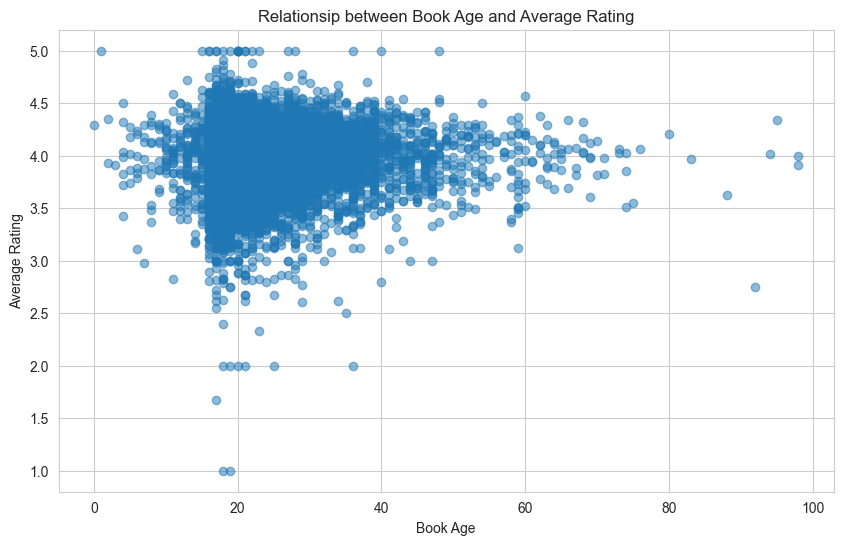

In [144]:
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the relationship beteew books' age and averahe rating
plt.figure(figsize=(10, 6))
plt.scatter(books['book_age'], books['average_rating'], alpha=.5)
plt.title('Relationsip between Book Age and Average Rating')
plt.xlabel('Book Age')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show

The cluster of books is around the age range of rouphly 10 - 40 years and have rating 3.4 - 4.5 
There is not that many books beyond 60+ years which is not suprising due to the nature of book publishing and data collection back there. 

The number of low-rated books is surprisingly low, indicating a potential bias towards popular books and higher ratings due to social influence would like to explore more about this issue..

In [145]:
import seaborn as sns 
from scipy.stats import ttest_ind

Average rating for books with many reviews: 4.00
Average rating for books with few reviews: 3.94


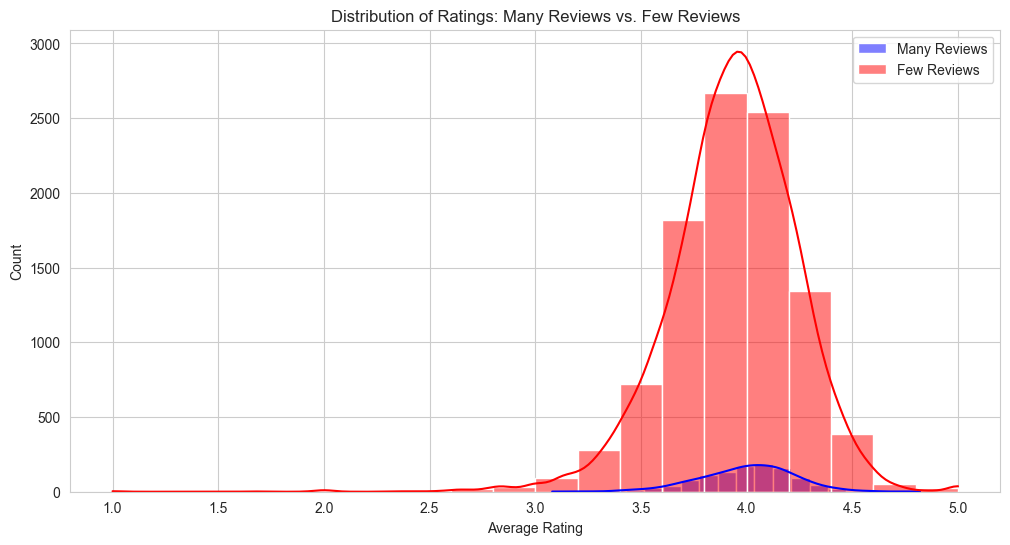

In [146]:
# Define threshold for many reviews (top 10%)
threshold = books['ratings_count'].quantile(0.90)

# Define the threshold for many reviews (e.g., top 10%)
threshold = books['ratings_count'].quantile(0.90)

# Segment the dataset
many_reviews = books[books['ratings_count'] > threshold]
few_reviews = books[books['ratings_count'] <= threshold]

# Calculate average ratings
avg_rating_many = many_reviews['average_rating'].mean()
avg_rating_few = few_reviews['average_rating'].mean()

print(f"Average rating for books with many reviews: {avg_rating_many:.2f}")
print(f"Average rating for books with few reviews: {avg_rating_few:.2f}")


plt.figure(figsize=(12,6))
sns.histplot(many_reviews['average_rating'], color = 'blue', label = 'Many Reviews', kde=True, bins=20)
sns.histplot(few_reviews['average_rating'], color='red', label='Few Reviews', kde=True, bins=20)
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings: Many Reviews vs. Few Reviews')
plt.legend()
plt.show()

When it comes to books with fewer reviews, the distribution is broader and takes on a near-normal (bell-shaped) form, although it has a slight positive skew. Although the average ratings for many books with a small number of reviews fall between 3.5 and 4.5

The distribution of ratings for books with a large number of reviews is narrower and more concentrated around the 4.0 to 4.5 range. This implies that books that are popular in terms of the number of reviews they receive generally have higher average ratings. Additionally, it is evident that there is a skewness in the distribution, as very few books with many reviews have a rating below 3.5.


bias: The visualization corroborates my suspicion that books with many reviews tend to have higher average ratings, which could indicate a herd mentality - popular books (those with many reviews) may receive consistently high ratings because of their popularity. On the other hand, books with fewer reviews have a more varied rating distribution, which could suggest a more unbiased or genuine reflection of readers' opinion

# Publisher Column

In [147]:
top_publisher = books['publisher'].value_counts().head()
top_publisher

publisher
Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
Name: count, dtype: int64